Welcome to the AI Employee



The shape of the dataset: (91, 7)

Number of missing values by features:
Rank            0
Country         0
Country Code    0
Gold            0
Silver          0
Bronze          0
Total           0
dtype: int64

Central tendencies of dataset:
            Rank       Gold     Silver     Bronze       Total
count  91.000000  91.000000  91.000000  91.000000   91.000000
mean   45.307692   3.604396   3.593407   4.219780   11.417582
std    25.652244   6.990278   6.770816   6.558798   19.702829
min     1.000000   0.000000   0.000000   0.000000    1.000000
25%    23.500000   0.000000   0.000000   1.000000    2.000000
50%    44.000000   1.000000   1.000000   2.000000    5.000000
75%    68.000000   3.000000   3.000000   5.000000    9.000000
max    84.000000  40.000000  44.000000  42.000000  126.000000



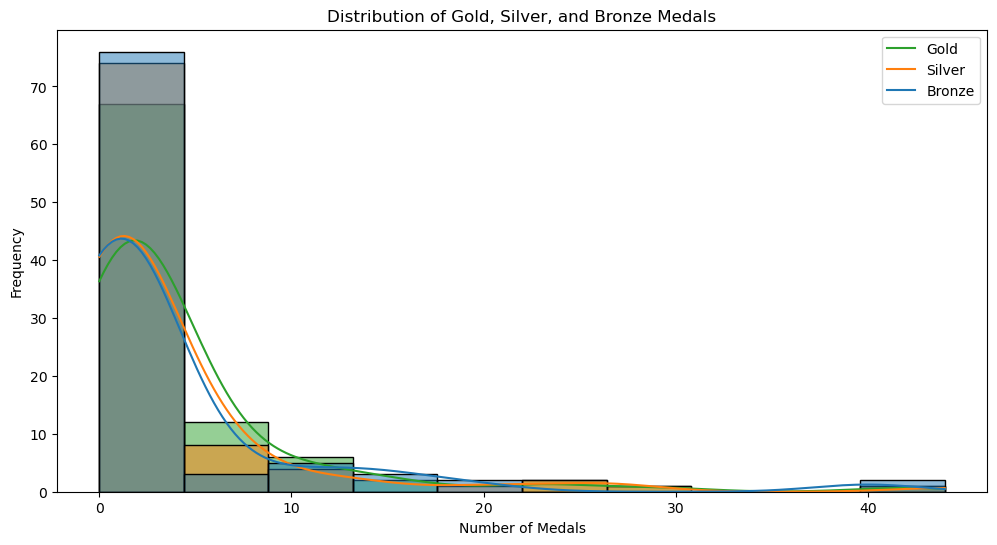

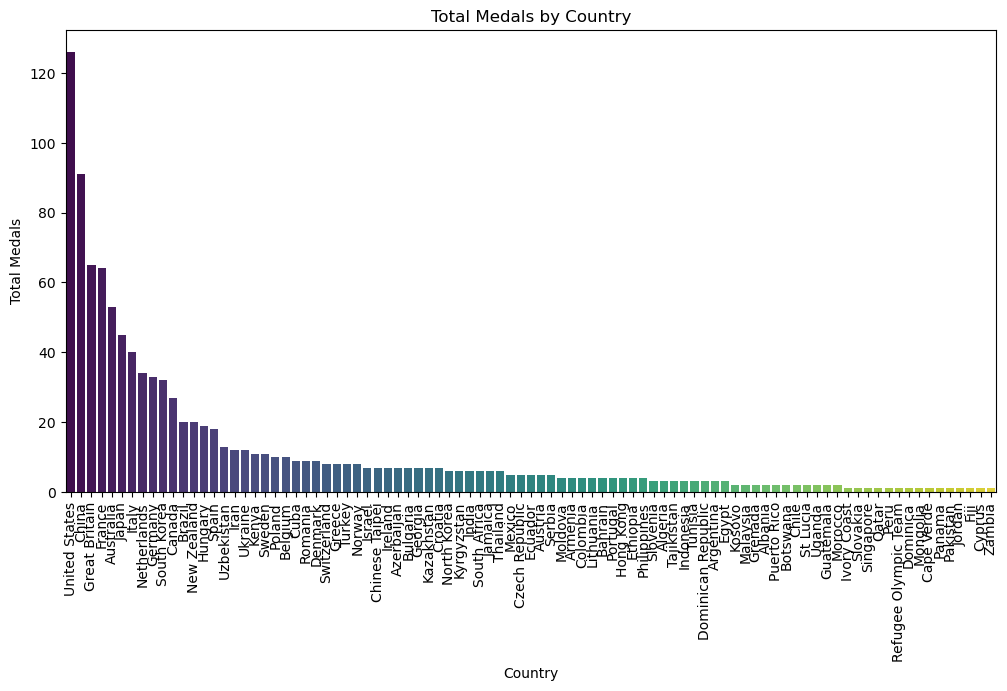

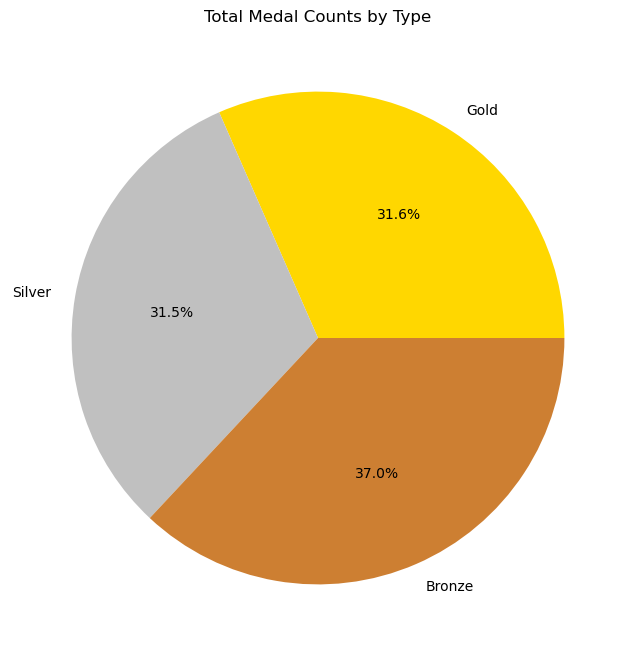

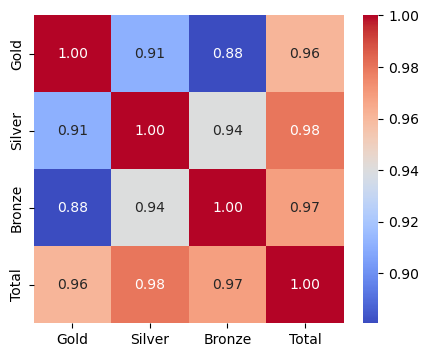

c:\Users\yaahr\miniconda3\envs\olm\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-Means Clustering: Centroids=[[ 1.4875      1.6         2.275       5.3625    ]
 [27.5        29.75       29.25       86.5       ]
 [14.14285714 11.42857143 12.14285714 37.71428571]]


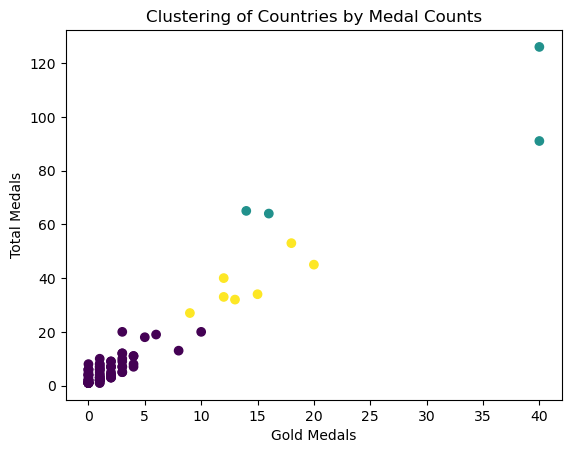

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from  sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA

class DataIngestion:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = self.load_data()

    def load_data(self):
        file_extension = os.path.splitext(self.file_path)[1]
        if file_extension == '.csv':
            return pd.read_csv(self.file_path)
        elif file_extension == '.json':
            return pd.read_json(self.file_path)
        elif file_extension == '.xlsx':
            return pd.read_excel(self.file_path)
        else:
            raise ValueError(f"Unsupported file format: {file_extension}")

    def clean_data(self):
        # Handling Missing values and Imputing missing rows
        self.df["Gold"] = self.df['Gold'].fillna(0)
        self.df["Silver"] = self.df['Silver'].fillna(0)
        self.df["Bronze"] = self.df['Bronze'].fillna(0)
        self.df["Total"] = self.df['Gold'] + self.df['Silver'] + self.df['Bronze']
        self.df = self.df.dropna(subset=['Country', 'Country Code'])


    def get_dataframe(self):
        return self.df
        
def generate_summaries(df):

    print(f"\nThe shape of the dataset: {df.shape}\n")
    print(f"Number of missing values by features:\n{df.isnull().sum()}\n")
    print(f"Central tendencies of dataset:\n{df.describe()}\n")
    return 

def generate_visualizations(df):
    # Plot distribution of Gold, Silver, and Bronze medals
    plt.figure(figsize=(12, 6))
    sns.histplot(df[['Gold', 'Silver', 'Bronze']], kde=True, bins=10)
    plt.title('Distribution of Gold, Silver, and Bronze Medals')
    plt.xlabel('Number of Medals')
    plt.ylabel('Frequency')
    plt.legend(['Gold', 'Silver', 'Bronze'])
    plt.show(block=True)

    #Total medals vs Country (Sorted)
    plt.figure(figsize=(12, 6))
    df_sorted = df.sort_values(by='Total', ascending=False)
    ax = sns.barplot(x='Country', y='Total', data=df_sorted, hue='Country', palette='viridis', legend=False)
    ax.tick_params(axis='x', rotation=90)
    plt.title('Total Medals by Country')
    plt.xlabel('Country')
    plt.ylabel('Total Medals')
    plt.show(block=True)

    #Pie chart for medals
    medal_counts = df[['Gold', 'Silver', 'Bronze']].sum()
    plt.figure(figsize=(8, 8))
    plt.pie(medal_counts, labels=medal_counts.index, autopct='%1.1f%%', colors=['gold', 'silver', '#cd7f32'])
    plt.title('Total Medal Counts by Type')
    plt.show(block=True)

    #Correlation Analysis
    correlation_matrix = df[['Gold', 'Silver', 'Bronze', 'Total']].corr()
    plt.figure(figsize=(5, 4))
    sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm',fmt='.2f')
    plt.show(block=True)

    plt.pause(0.5)
    return 

class AnalysisEngine:
    def __init__(self, df):
        self.df = df

    def kmeans_clustering(self, n_clusters):
        X = self.df[['Gold', 'Silver', 'Bronze','Total']]
        kmeans = KMeans(n_clusters=3, random_state=0)  
        self.df['Cluster'] = kmeans.fit_predict(X)
        return kmeans

    def pca_analysis(self):
        pca = PCA(n_components=2)
        components = pca.fit_transform(self.df[['Gold', 'Silver', 'Bronze', 'Total']])
        self.df['PCA1'] = components[:, 0]
        self.df['PCA2'] = components[:, 1]
        return pca
        
    def decision_tree_classification(self):
        self.df['Gold_Category'] = pd.cut(
            self.df['Gold'], 
            bins=[-1, 3, 14, float('inf')],  
            labels=['Low', 'Medium', 'High'] 
        )
        encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
        self.df['Gold_Category_Encoded'] = encoder.fit_transform(self.df[['Gold_Category']])

        X = self.df[['Gold', 'Silver', 'Bronze', 'Total']]
        y = self.df['Gold_Category_Encoded']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
        decision_tree = DecisionTreeClassifier(random_state=0)
        decision_tree.fit(X_train, y_train)
        return (decision_tree,X_test,y_test)

    def random_forest_classification(self):
        self.df['Gold_Category'] = pd.cut(
            self.df['Gold'], 
            bins=[-1, 3, 14, float('inf')],  
            labels=['Low', 'Medium', 'High'] 
        )
        encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
        self.df['Gold_Category_Encoded'] = encoder.fit_transform(self.df[['Gold_Category']])

        X = self.df[['Gold', 'Silver', 'Bronze', 'Total']]
        y = self.df['Gold_Category_Encoded']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
        random_forest = RandomForestClassifier(random_state=0)
        random_forest.fit(X_train, y_train)
        return (random_forest,X_test,y_test)

def cli_interface():
    print("Welcome to the AI Employee")
    file_path = input("Please enter the path to your dataset (CSV, JSON, Excel): ")
    processor = DataIngestion(file_path)
    processor.clean_data()
    df = processor.get_dataframe()

    generate_summaries(df)
    generate_visualizations(df)
    
    engine = AnalysisEngine(df)
    model_type = input("Choose analysis: [1] K-Means Clustering [2] PCA [3] Decision Tree Classification [4]RandomForest Classification ")
        
    if model_type == '1':
        n_clusters = int(input("Enter the number of clusters: "))
        model = engine.kmeans_clustering(n_clusters)
        print(f"K-Means Clustering: Centroids={model.cluster_centers_}")
        # Visualize the clusters
        plt.scatter(df['Gold'], df['Total'], c=df['Cluster'])
        plt.xlabel('Gold Medals')
        plt.ylabel('Total Medals')
        plt.title('Clustering of Countries by Medal Counts')
        plt.show()
        
    elif model_type == '2':
        pca = engine.pca_analysis()
        print(f"PCA Components: {pca.components_}")

    elif model_type == "3":
        dtc,X_test,y_test = engine.decision_tree_classification()
        # Predict on the test set
        y_pred_tree = dtc.predict(X_test)
        
        # Evaluate the Decision Tree Classifier
        print("Decision Tree Classifier:")
        print("Accuracy:", accuracy_score(y_test, y_pred_tree))
        print(classification_report(y_test, y_pred_tree, target_names=['Low', 'Medium', 'High']))

    elif model_type == "4":
        rfc,X_test,y_test = engine.random_forest_classification()
        # Predict on the test set
        y_pred_forest = rfc.predict(X_test)
        
        # Evaluate the Random Forest Classifier
        print("Random Forest Classifier:")
        print("Accuracy:", accuracy_score(y_test, y_pred_forest))
        print(classification_report(y_test, y_pred_forest, target_names=['Low', 'Medium', 'High']))
    else:
        print("Invalid choice. Exiting.")
        return
        
cli_interface()

In [3]:
import pandas
df = pd.read_csv("olympics2024.csv")

In [7]:
import spacy
import argparse


nlp = spacy.load("en_core_web_sm")

def process_query(query):
    doc = nlp(query.lower())
    
    if "gold" in query:
        if "most" in query:
        
            result = df.loc[df['Gold'].idxmax(), 'Country']
            return f"The country with the most gold medals is {result}."
        else:
            pass
    
    elif "total" in query and "medal" in query:
        # Query for total medals of a specific country
        country = [ent.text for ent in doc.ents if ent.label_ == 'GPE']
        if country:
            result = df.loc[df['Country'] == country[0], 'Total'].values
            if len(result) > 0:
                return f"The total number of medals for {country[0]} is {result[0]}."
            else:
                return f"No data found for {country[0]}."
    

    return "Sorry, I didn't understand your query."

def interactive_query():
    query = input("Enter your query about the Olympic dataset: ")
    response = process_query(query)
    print(response)

interactive_query()

The country with the most gold medals is United States.
